<img src='imagem11.jpg' alt='Logo' style='width:200px;'/>
# <font color=blue>1. Coleta dos Dados com Google Analytics</font>
<img src='imagem.png' alt='Logo' style='width:20000000px;'/>


### <font color=red>Utilizou-se o Inquérito por Questionário e uma metodologia mais quantitativa para recolher e avaliar os dados, respetivamente</font>

# <font color=blue>2. Limpeza e Transformação dos Dados - Data Wrangling/Munging</font>

In [1]:
## Importando os pacotes de análise de dados - PYTHON OPEN DATA SCIENCE STACK
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lendo o Microsoft Excel em formato Comma Separated Values (.csv) com as respostas do questionário
# e importando para o formato tabular do pacote Pandas
df = pd.read_csv("Questionario.csv")
df.head()

,Carimbo de data/hora,Pontuação total,1.1 - Idade,1.1 - Idade [Pontuação],1.1 - Idade [Feedback],1.2 - Sexo,1.2 - Sexo [Pontuação],1.2 - Sexo [Feedback],1.3 - Habilitações Académicas,1.3 - Habilitações Académicas [Pontuação],...,3 - Recomendaria este questionário a alguém?,3 - Recomendaria este questionário a alguém? [Pontuação],3 - Recomendaria este questionário a alguém? [Feedback],4 - Terá mais atenção agora quando for ler uma notícia?,4 - Terá mais atenção agora quando for ler uma notícia? [Pontuação],4 - Terá mais atenção agora quando for ler uma notícia? [Feedback],Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,2019/04/18 3:23:12 PM GMT+1,69.00 / 100,< 18,-- / 0,NaN,Masculino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,4.0,3.0,1.0,2.0
1,2019/04/18 4:16:38 PM GMT+1,58.00 / 100,18-25,-- / 0,NaN,Feminino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,5.0,2.0,4.0,3.0
2,2019/04/18 4:24:54 PM GMT+1,63.00 / 100,18-25,-- / 0,NaN,Feminino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,5.0,4.0,1.0,2.0
3,2019/04/18 11:25:06 PM GMT+1,64.00 / 100,18-25,-- / 0,NaN,Masculino,-- / 0,NaN,Licenciatura,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,NaN,NaN,NaN,NaN
4,2019/04/24 12:47:30 AM GMT+1,57.00 / 100,18-25,-- / 0,NaN,Masculino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Não,-- / 0,NaN,Não,0.00 / 1,NaN,NaN,NaN,NaN,NaN


In [3]:
# Organizando os dados para uma melhor análise, excluíndo aqueles que não foram considerados relevantes
# Eliminadno colunas desnecessárias
for x in df:
    if ("[Pontuação]" in x):
        df = df.drop(x, 1)
    elif ("[Feedback]" in x):
        df = df.drop(x, 1)
    elif ("Unnamed" in x):
        df = df.drop(x, axis=1)
    elif ("Carimbo de data/hora" == x):
        df = df.drop(x, axis=1)
        
# Eliminando linhas de teste
for y in range(0, 4):
    df = df.drop(y)
df = df.drop(7)

# Renomeando linhas
df.index = list(range(1,201))
df

,Pontuação total,1.1 - Idade,1.2 - Sexo,1.3 - Habilitações Académicas,1.4 - Curso a frequentar,2.1 - Tem acesso à Internet em casa?,2.2 - Costuma utilizar a Internet noutro lugar?,2.3 - Qual é o meio que mais utiliza para estar a par das notícias?,"2.4 - Sabe o que significa ""Fake News""?","2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?",...,"2.9 - Costuma utilizar operadores boleanos (AND, NOT e OR) para restringir as suas pesquisas?",2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Fiabilidade],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Relevância],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Atualização],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Completa],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Explicita],1 - Achou este questionário útil?,"2 - Achou o preenchimento deste questionário acessível em termos de clareza, precisão e tempo?",3 - Recomendaria este questionário a alguém?,4 - Terá mais atenção agora quando for ler uma notícia?
1,57.00 / 100,18-25,Masculino,Ensino Secundário,MIEIC,Sim,Sim,Redes Sociais,Sim,“Fake News” são informações fabricadas que imi...,...,Frequentemente,4º,5º,3º,1º,2º,Não,Não,Não,Não
2,75.00 / 100,18-25,Masculino,Mestrado,MIEEC,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Raramente,5º,2º,1º,3º,4º,Sim,Sim,Sim,Sim
3,80.00 / 100,18-25,Masculino,Licenciatura,Mestrado em Multimedia,Sim,Sim,Jornais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,1º,2º,4º,3º,5º,Sim,Sim,Sim,Sim
4,77.00 / 100,18-25,Masculino,Ensino Secundário,Mestrado Integrado em Bioengenharia,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,1º,5º,4º,2º,3º,Sim,Sim,Não,Sim
5,38.00 / 100,18-25,Masculino,Mestrado,Mestrado em Engenharia Civil,Sim,Sim,Televisão,Sim,“Fake News” são informações fabricadas que imi...,...,Raramente,5º,3º,4º,1º,2º,Sim,Sim,Sim,Sim
6,84.00 / 100,18-25,Feminino,Ensino Secundário,Mestrado Integrado em Engenharia Mecânica,Sim,Sim,Televisão,Sim,"""Fake News"" são informações fabricadas proposi...",...,Às vezes,3º,1º,2º,5º,4º,Não,Sim,Sim,Não
7,78.00 / 100,18-25,Feminino,Ensino Secundário,MIEEC,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,5º,4º,3º,2º,1º,Sim,Não,Não,Sim
8,80.00 / 100,18-25,Masculino,Licenciatura,Informatica,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,5º,1º,3º,4º,2º,Não,Não,Não,Não
9,77.00 / 100,18-25,Masculino,Ensino Secundário,mieec,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,1º,5º,2º,3º,4º,Sim,Sim,Sim,Sim
10,63.00 / 100,41-65,Feminino,Doutoramento,UC Acústica Ambiental MIEA,Sim,Sim,Redes Sociais,Sim,“Fake News” são informações fabricadas que imi...,...,Às vezes,1º,5º,2º,3º,4º,Sim,Sim,Sim,Sim


# <font color=blue>2. Visualização dos Dados</font>

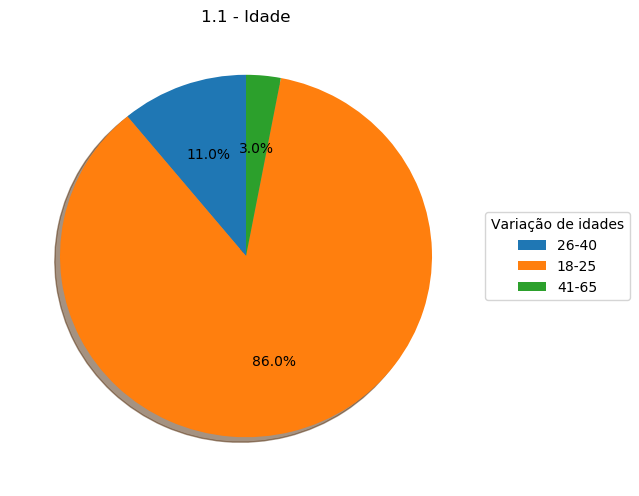

In [134]:
# Pergunta 1.1
# Calcular as categorias e suas frequências
idades = ["26-40","18-25", "41-65"]
frequencia = []
for x in idades:
    mask = df["1.1 - Idade"] == x
    df1 = df[mask]
    df2 = df1["1.1 - Idade"]
    df3 = df2.count()
    frequencia.append(df3)

# Visualizar a pergunta 1.1 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("1.1 - Idade")
plt.legend(idades, title="Variação de idades", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## <font color=red>Note-se que não existem as restantes categorias, pelo que a sua frequência é 0</font>

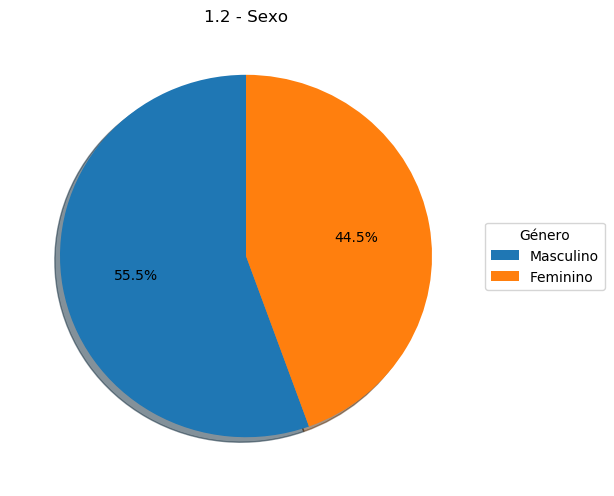

In [136]:
# Pergunta 1.2
# Calcular as categorias e suas frequências
genero = ["Masculino","Feminino"]
frequencia = []
for x in genero:
    mask = df["1.2 - Sexo"] == x
    df1 = df[mask]
    df2 = df1["1.2 - Sexo"]
    df3 = df2.count()
    frequencia.append(df3)

# Visualizar a pergunta 1.2 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("1.2 - Sexo")
plt.legend(genero, title="Género", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

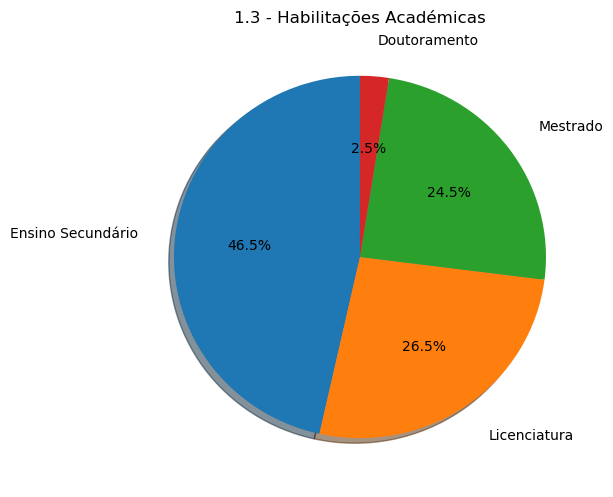

In [6]:
# Pergunta 1.3
# Calcular as categorias e suas frequências
habilitacoes = ["Ensino Secundário", "Licenciatura", "Mestrado", "Doutoramento"]
frequencia = []
for x in habilitacoes:
    mask = df["1.3 - Habilitações Académicas"] == x
    df1 = df[mask]
    df2 = df1["1.3 - Habilitações Académicas"]
    df3 = df2.count()
    frequencia.append(df3)

# Visualizar a pergunta 1.3 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, labels = habilitacoes, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("1.3 - Habilitações Académicas")
plt.show()

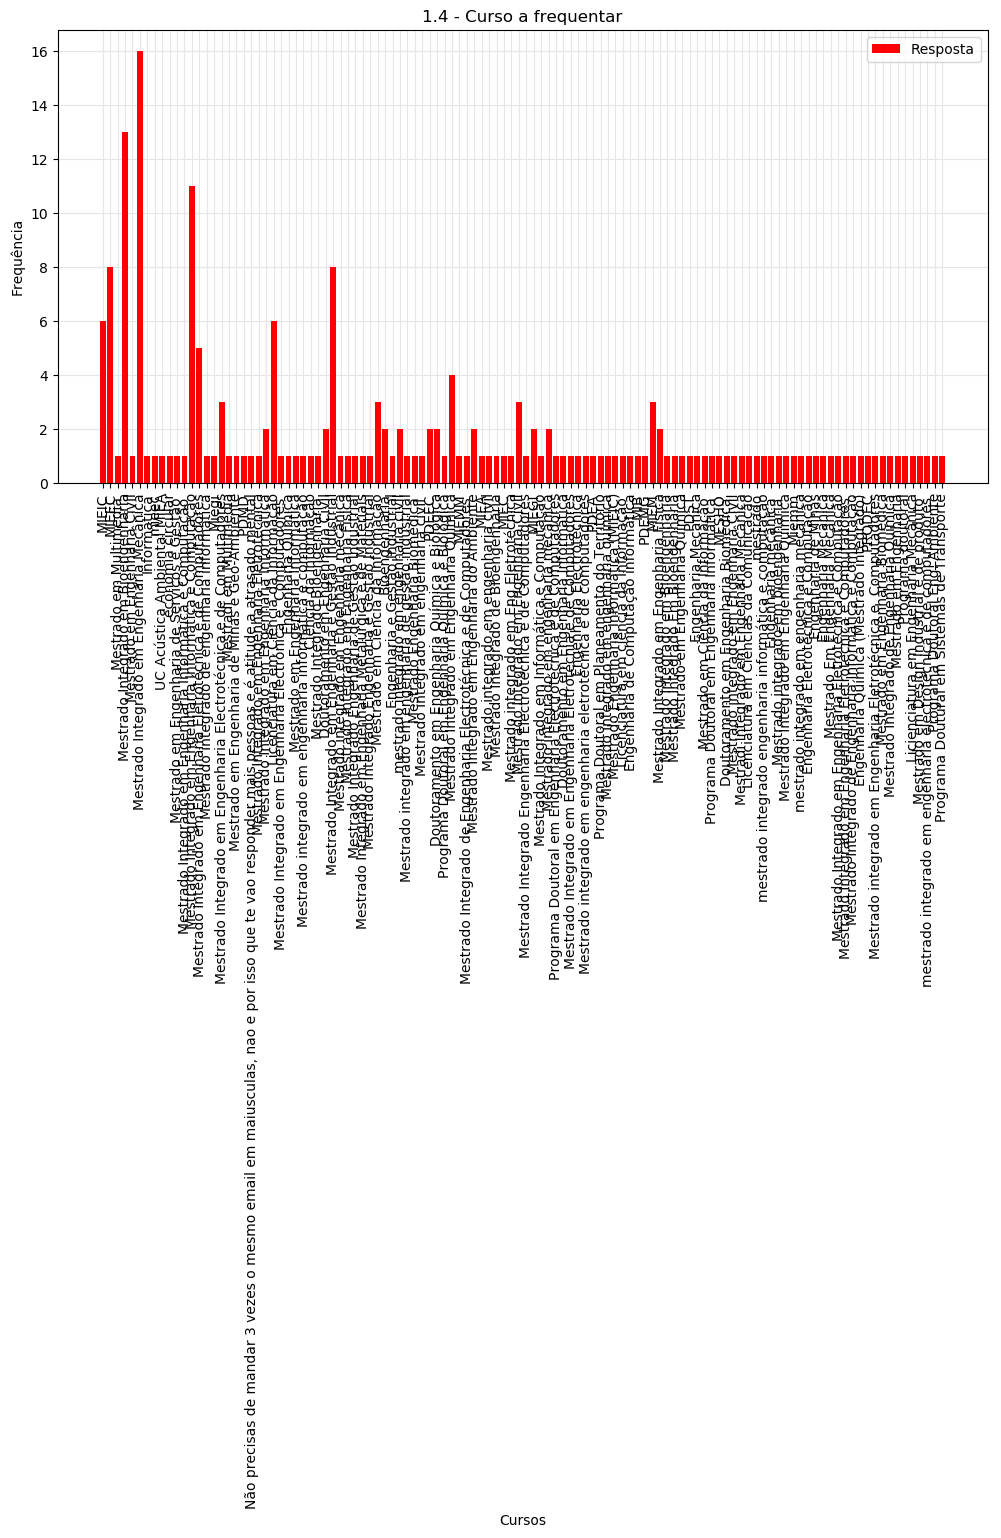

In [7]:
# Pergunta 1.4
# 1º Round
# Calcular todas as categorias (considerando todas as possibilidades para um curso) e suas frequências
frequencia = []
curso = []
for x in df["1.4 - Curso a frequentar"]:
    if (x not in curso):
        curso.append(x)
        mask = df["1.4 - Curso a frequentar"] == x
        df1 = df[mask]
        df2 = df1["1.4 - Curso a frequentar"]
        df3 = df2.count()
        frequencia.append(df3)
    else:
        pass

# Visualizar a pergunta 1.4 num gráfico de barras com todas as categorias e frequências
plt.figure(figsize = (12, 6), dpi = 100)
plt.grid(color = '0.90')
plt.bar(curso, frequencia, zorder = 100, color="r", label="Resposta")
plt.xlabel("Cursos")
plt.title("1.4 - Curso a frequentar")
plt.ylabel("Frequência")
plt.xticks(rotation=90)
plt.legend()
plt.show()

## <font color=red>Note-se que são demasiados cursos, sendo que muitos deles foram escritos com letras maiúsculas/minúsculas ou com siglas</font>
### <font color=blue>Filtrar-se-á cada curso único somente uma vez</font>
Procedimentos:
    1. Filtrar os cursos por letra maiúscula, solucionando o problema dos cursos com letras maiúsculas/minúsculas
    2. Somar as siglas aos respetivos cursos

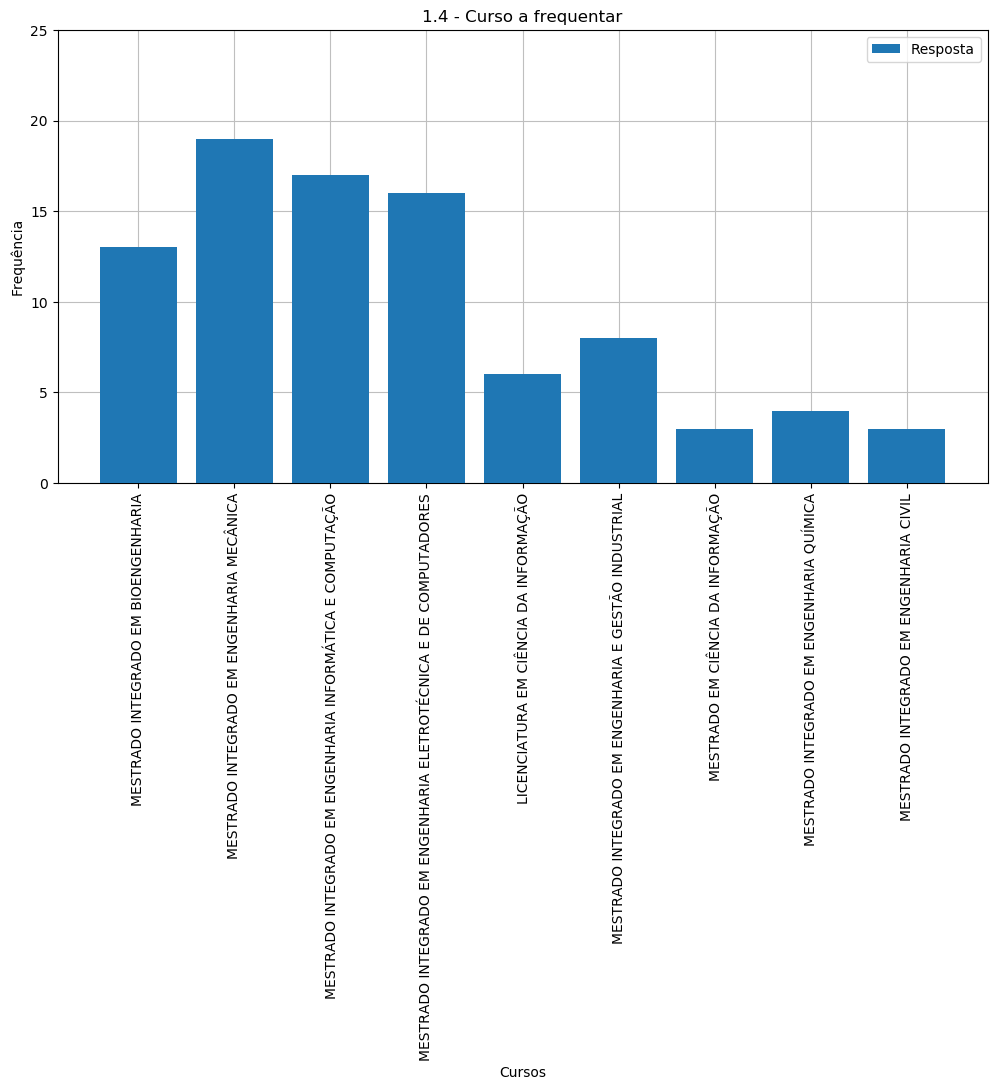

In [8]:
# Pergunta 1.4
# 2º Round
# Calcular todas as categorias únicas e com frequências superiores a 2
frequencia = []
curso = []
for x in df["1.4 - Curso a frequentar"]:
    # Filtrar os cursos por letra maiúscula, solucionando o problema dos cursos com letras maiúsculas/minúsculas
    y = x.upper()
    if (y not in curso):
        mask = df["1.4 - Curso a frequentar"] == x
        df1 = df[mask]
        df2 = df1["1.4 - Curso a frequentar"]
        df3 = df2.count()
        if (df3 > 2): 
            frequencia.append(df3)
            curso.append(y)
        else:
            pass
    else:
        pass
    
# Somar as siglas aos respetivos cursos
MIEIC, MIEEC, MIEEC1, MIEM = np.array(frequencia[0]), np.array(frequencia[1]), np.array(frequencia[6]), np.array(frequencia[-1])
array = np.array(frequencia)
array[4] += MIEIC; array[5] += MIEEC; array[5] += MIEEC1; array[3] += MIEM
frequencia = list(array)
del(frequencia[0], frequencia[0], frequencia[4], frequencia[-1]); del(curso[0], curso[0], curso[4], curso[-1])
curso, frequencia

# Visualizar a pergunta 1.4 num gráfico de barras dos cursos únicos e com frequências superiores a 2
plt.figure(figsize = (12, 6), dpi = 100)
plt.grid(color = '0.75')
plt.bar(curso, frequencia, zorder = 100, label="Resposta")
plt.xlabel("Cursos")
plt.ylabel("Frequência")
plt.xticks(rotation=90)
plt.ylim(0, 25)
plt.title("1.4 - Curso a frequentar")
plt.legend()

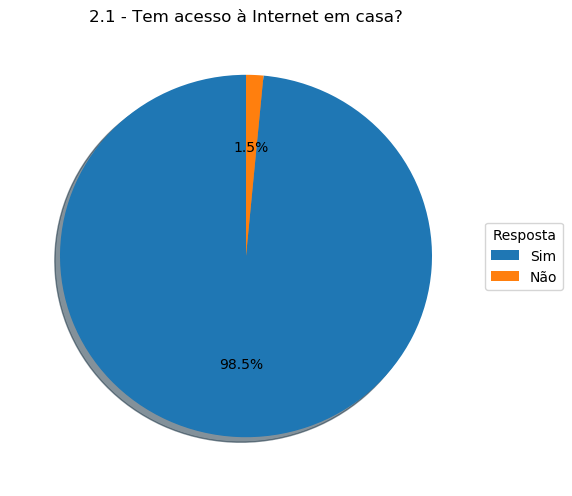

In [137]:
# Pergunta 2.1
# Calcular as categorias e suas frequências
acesso = ["Sim", "Não"]
frequencia = []
for x in acesso:
    mask = df["2.1 - Tem acesso à Internet em casa?"] == x
    df1 = df[mask]
    df2 = df1["2.1 - Tem acesso à Internet em casa?"]
    df3 = df2.count()
    frequencia.append(df3)

# Visualizar a pergunta 2.1 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("2.1 - Tem acesso à Internet em casa?")
plt.legend(acesso, title="Resposta", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

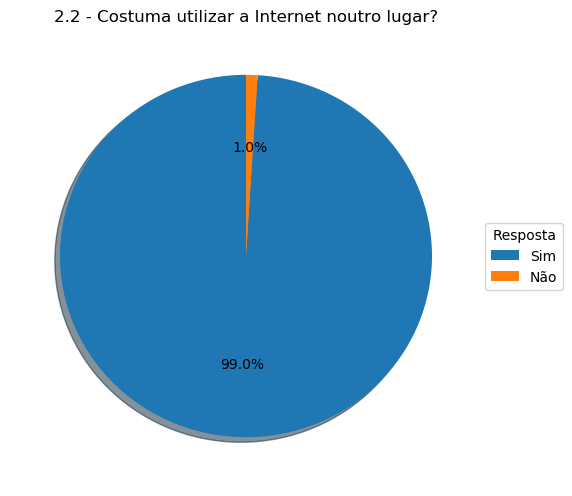

In [138]:
# Pergunta 2.2
# Calcular as categorias e suas frequências
utilizacao = ["Sim", "Não"]
frequencia = []
for x in utilizacao:
    mask = df["2.2 - Costuma utilizar a Internet noutro lugar?"] == x
    df1 = df[mask]
    df2 = df1["2.2 - Costuma utilizar a Internet noutro lugar?"]
    df3 = df2.count()
    frequencia.append(df3)

# Visualizar a pergunta 2.2 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("2.2 - Costuma utilizar a Internet noutro lugar?")
plt.legend(utilizacao, title="Resposta", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

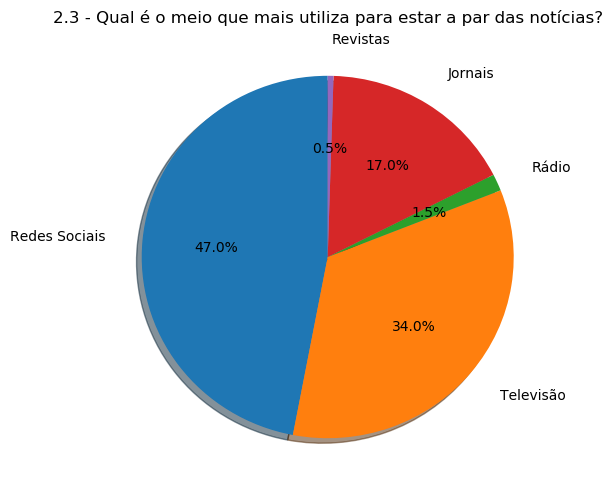

In [11]:
# Pergunta 2.3
# Calcular as categorias e suas frequências
meio = ["Redes Sociais", "Televisão", "Rádio", "Jornais", "Revistas"]
frequencia = []
for x in meio:
    mask = df["2.3 - Qual é o meio que mais utiliza para estar a par das notícias?"] == x
    df1 = df[mask]
    df2 = df1["2.3 - Qual é o meio que mais utiliza para estar a par das notícias?"]
    df3 = df2.count()
    frequencia.append(df3)

# Visualizar a pergunta 2.3 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, labels = meio, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("2.3 - Qual é o meio que mais utiliza para estar a par das notícias?")
plt.show()

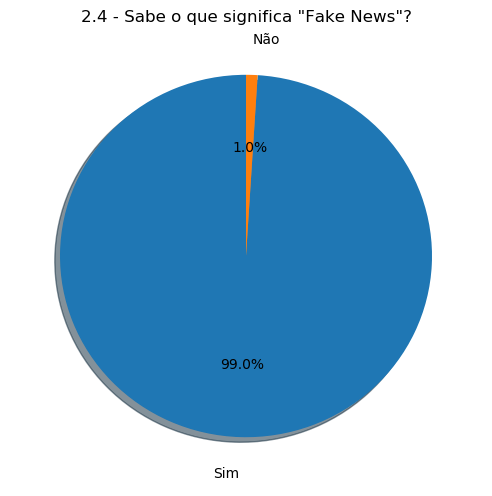

In [12]:
# Pergunta 2.4
# Calcular as categorias e suas frequências
conhecimento = ["Sim", "Não"]
frequencia = []
for x in conhecimento:
    mask = df['2.4 - Sabe o que significa "Fake News"?'] == x
    df1 = df[mask]
    df2 = df1['2.4 - Sabe o que significa "Fake News"?']
    df3 = df2.count()
    frequencia.append(df3)

# Visualizar a pergunta 2.4 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, labels = conhecimento, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title('2.4 - Sabe o que significa "Fake News"?')
plt.show()

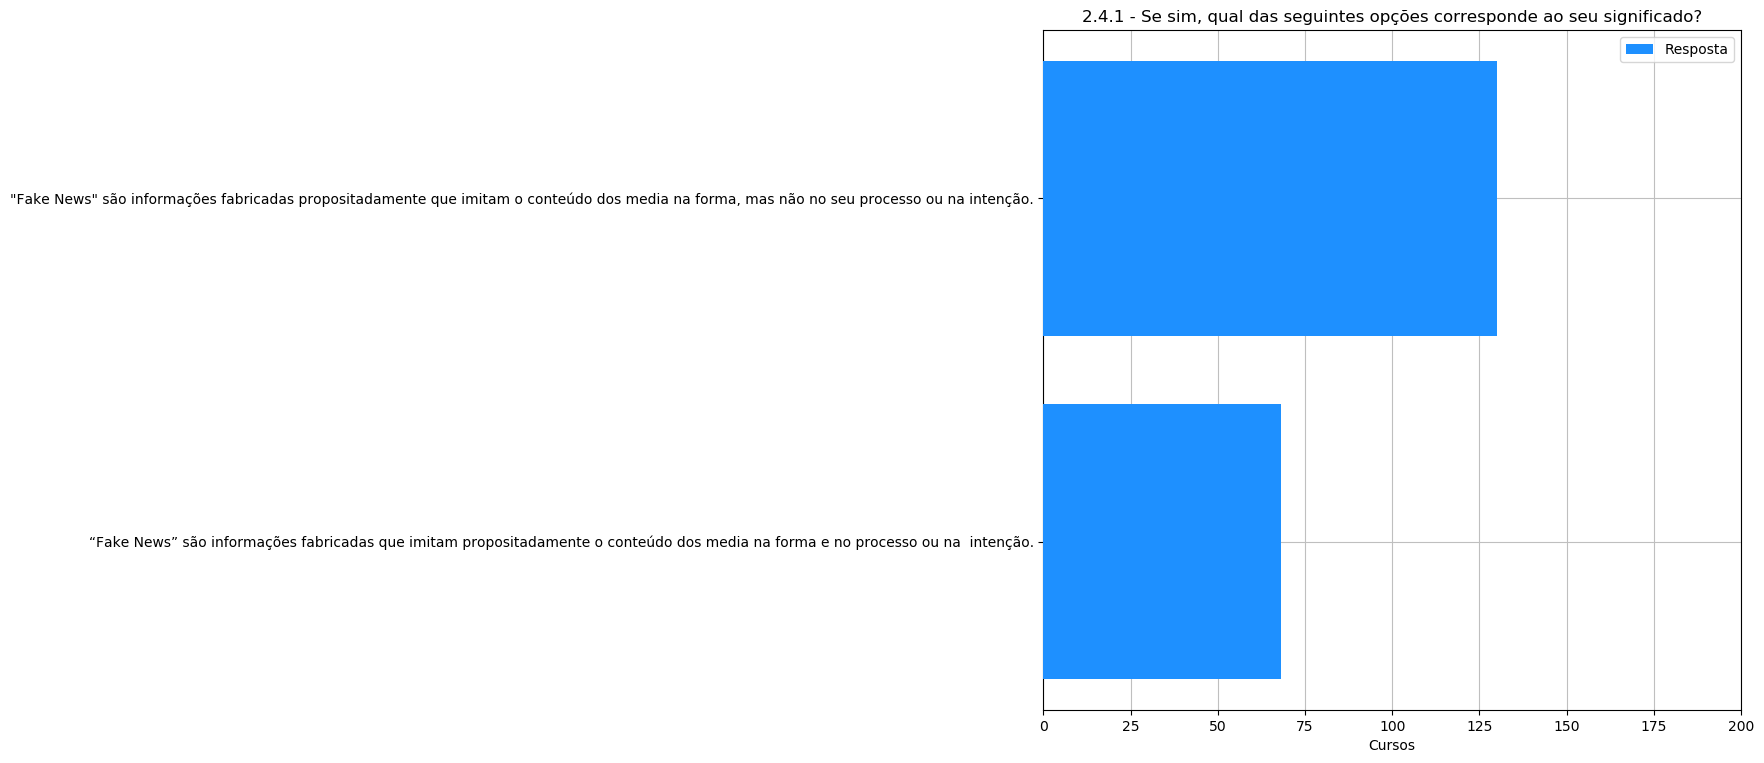

In [110]:
# Pergunta 2.4.1
# Calcular todas as categorias e frequências
frequencia = []
resposta = []
for x in df["2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?"]:
    if (type(x) != str):
            pass
    else:
        if (x not in resposta):
            resposta.append(x)
            mask = df["2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?"] == x
            df1 = df[mask]
            df2 = df1["2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?"]
            df3 = df2.count()
            frequencia.append(df3)
        else:
            pass

frequencia = tuple(frequencia)
y_pos = np.arange(len(resposta))

# Visualizar a pergunta 2.4.1 num gráfico de barras
plt.figure(figsize = (9, 9), dpi = 100)
plt.grid(color = '0.75')
plt.barh(y_pos, frequencia, zorder = 100, label = "Resposta", color = "dodgerblue")
plt.xlabel("Cursos")
plt.xlim(0, 200)
plt.yticks(y_pos, resposta)
plt.title("2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?")
plt.legend()
plt.show()

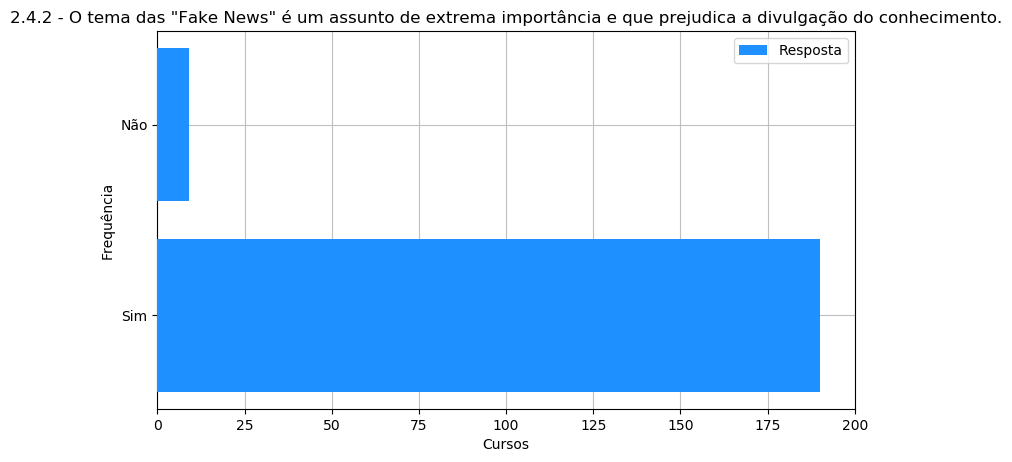

In [117]:
# Pergunta 2.4.2
# Calcular todas as categorias e frequências
frequencia = []
resposta = []
for x in df['2.4.2 - O tema das "Fake News" é um assunto de extrema importância e que prejudica a divulgação do conhecimento.']:
    if (type(x) != str):
            pass
    else:
        if (x not in resposta):
            resposta.append(x)
            mask = df['2.4.2 - O tema das "Fake News" é um assunto de extrema importância e que prejudica a divulgação do conhecimento.'] == x
            df1 = df[mask]
            df2 = df1['2.4.2 - O tema das "Fake News" é um assunto de extrema importância e que prejudica a divulgação do conhecimento.']
            df3 = df2.count()
            frequencia.append(df3)
        else:
            pass

frequencia = tuple(frequencia)
y_pos = np.arange(len(resposta))

# Visualizar a pergunta 2.4.1 num gráfico de barras
plt.figure(figsize = (9, 5), dpi = 100)
plt.grid(color = '0.75')
plt.barh(y_pos, frequencia, zorder = 100, label = "Resposta", color = "dodgerblue")
plt.xlabel("Cursos")
plt.xlim(0, 200)
plt.yticks(y_pos, resposta)
plt.ylabel("Frequência")
plt.title('2.4.2 - O tema das "Fake News" é um assunto de extrema importância e que prejudica a divulgação do conhecimento.')
plt.legend()
plt.show()